In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_excel("Hasil Survey Pancasila.xlsx")
df.head()

,Nama Anda ?,Status Anda ?,Apa saja norma pancasila yg anda temui di lingkunhan sekitar dan keluarga anda?,Seberapa penting Pancasila bagi kehidupan bermasyarakat ?,Pilih Aktivitas masyarakat yang berkaitan dengan Pancasila !,"Menurut Anda, seberapa penting warga Indonesia memahami Nilai Pancasila ?","Jelaskan alasannya, mengapa warga Indonesia harus memahami Nilai Pancasila!",Apakah Anda turut andil dalam setiap kegiatan yang ada di sekitar Lingkungan Anda tinggal ?,"Menurut Anda apa yang harus dilakukan oleh lingkungan sekitar Anda tinggal, untuk mencapai nilai Pancasila ?",Submitted At,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Pram,Mahasiswa,NaN,7,"Siskamling, Musyawarah, Gotong Royong",9,Agar tujuan bangsa dan negara tercapai,True,Banyakin diskusi dan gotong royong secara rutin,2020-12-22 07:33:59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pramarti,Mahasiswa,NaN,10,"Musyawarah, Gotong Royong, Kegiatan rutin ruma...",10,"Dikarenakan Pancasila sebagai dasar negara, ja...",False,"Sering gotong royong, paling tidak seminggu se...",2020-12-22 07:48:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fadhlan Fadhlillah,Mahasiswa,NaN,9,"Gotong Royong, Musyawarah, Kegiatan rutin ruma...",10,Pancasila ini menjadi dasar bagi kita untuk sa...,False,"Saling bergotong royong, dan bermusyawarah dal...",2020-12-22 14:18:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Raihan Ekaputra,Mahasiswa,NaN,9,"Siskamling, Pelaksanaan Pemilu/ Pilkada (TPS),...",9,Karena Pancasila dasar negara yang harus dipah...,True,"Kegiatan Siskamling, Gotong Royong",2020-12-23 01:53:33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rimas,Mahasiswa,"Norma Agama, Kesopanan, Kesusilaan, dan Hukum",10,"Musyawarah, Upacara Bendera, Lomba antar Rukun...",10,Karena pancasila adalah pedoman kewarganegaraa...,False,"Dengan sering mengadakan acara warga, perbanya...",2020-12-26 13:34:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.dropna(axis=1,inplace=True)
df.columns

Index(['Nama Anda ?', 'Status Anda ?',
       'Seberapa penting Pancasila bagi kehidupan bermasyarakat ?',
       'Pilih Aktivitas masyarakat yang berkaitan dengan Pancasila !',
       'Menurut Anda, seberapa penting warga Indonesia memahami Nilai Pancasila ?',
       'Jelaskan alasannya, mengapa warga Indonesia harus memahami Nilai Pancasila!',
       'Apakah Anda turut andil dalam setiap kegiatan yang ada di sekitar Lingkungan Anda tinggal ?',
       'Menurut Anda apa yang harus dilakukan oleh lingkungan sekitar Anda tinggal, untuk mencapai nilai Pancasila ?',
       'Submitted At', 'Token'],
      dtype='object')

In [56]:
df.columns = ["nama","status","pentingpancasila","aktivitas","pahampancasila","whypaham","partisipasi","halyangdilakukan","submit","token"]
df.drop(["submit","token"],axis=1,inplace=True)
df.head()

,nama,status,pentingpancasila,aktivitas,pahampancasila,whypaham,partisipasi,halyangdilakukan
0,Pram,Mahasiswa,7,"Siskamling, Musyawarah, Gotong Royong",9,Agar tujuan bangsa dan negara tercapai,True,Banyakin diskusi dan gotong royong secara rutin
1,Pramarti,Mahasiswa,10,"Musyawarah, Gotong Royong, Kegiatan rutin ruma...",10,"Dikarenakan Pancasila sebagai dasar negara, ja...",False,"Sering gotong royong, paling tidak seminggu se..."
2,Fadhlan Fadhlillah,Mahasiswa,9,"Gotong Royong, Musyawarah, Kegiatan rutin ruma...",10,Pancasila ini menjadi dasar bagi kita untuk sa...,False,"Saling bergotong royong, dan bermusyawarah dal..."
3,Raihan Ekaputra,Mahasiswa,9,"Siskamling, Pelaksanaan Pemilu/ Pilkada (TPS),...",9,Karena Pancasila dasar negara yang harus dipah...,True,"Kegiatan Siskamling, Gotong Royong"
4,Rimas,Mahasiswa,10,"Musyawarah, Upacara Bendera, Lomba antar Rukun...",10,Karena pancasila adalah pedoman kewarganegaraa...,False,"Dengan sering mengadakan acara warga, perbanya..."


In [230]:
barWidth = 0.25

df.groupby('status')["pahampancasila"].unique()[1]
df.groupby("status")["pahampancasila"].value_counts()[3:7]

status     pahampancasila
Mahasiswa  10                20
           9                 10
           8                  3
           6                  1
Name: pahampancasila, dtype: int64

[Text(0.5, 0, 'Pekerja')]

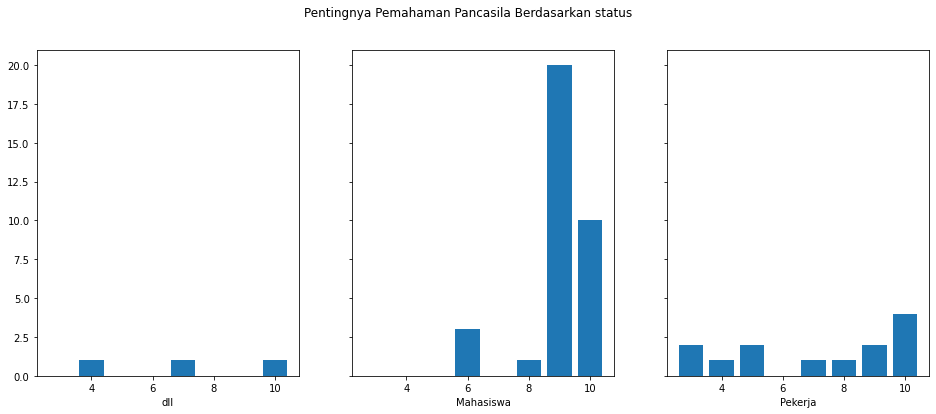

In [247]:
f,ax = plt.subplots(1,3,figsize=(16,6),sharex=True,sharey=True)
f.suptitle("Pentingnya Pemahaman Pancasila Berdasarkan status")
ax[0].bar(df.groupby('status')["pahampancasila"].unique()[0],df.groupby("status")["pahampancasila"].value_counts()[0:3])
ax[0].set(xlabel="dll",)
ax[1].bar(df.groupby('status')["pahampancasila"].unique()[1],df.groupby("status")["pahampancasila"].value_counts()[3:7])
ax[1].set(xlabel="Mahasiswa",)
ax[2].bar(df.groupby('status')["pahampancasila"].unique()[2],df.groupby("status")["pahampancasila"].value_counts()[7:])
ax[2].set(xlabel="Pekerja")

<BarContainer object of 8 artists>

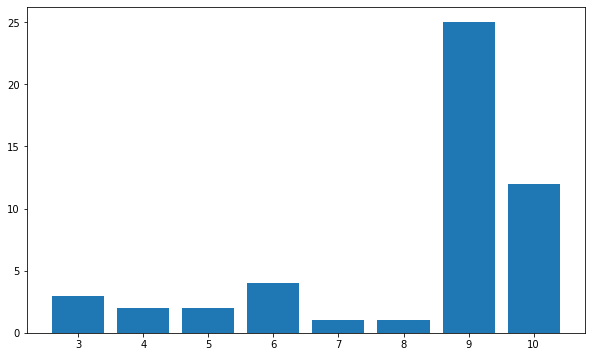

In [246]:
f,ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(df["pahampancasila"].unique(), df["pahampancasila"].value_counts())

[Text(0.5, 0, 'Pekerja')]

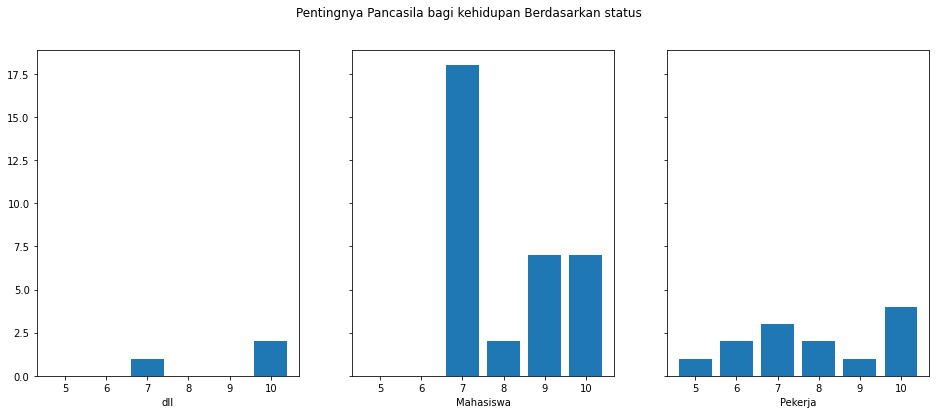

In [242]:
f,ax = plt.subplots(1,3,figsize=(16,6),sharex=True,sharey=True)
f.suptitle("Pentingnya Pancasila bagi kehidupan Berdasarkan status")
ax[0].bar(df.groupby('status')["pentingpancasila"].unique()[0],df.groupby("status")["pentingpancasila"].value_counts()[0:2])
ax[0].set(xlabel="dll",)
ax[1].bar(df.groupby('status')["pentingpancasila"].unique()[1],df.groupby("status")["pentingpancasila"].value_counts()[2:6])
ax[1].set(xlabel="Mahasiswa",)
ax[2].bar(df.groupby('status')["pentingpancasila"].unique()[2],df.groupby("status")["pentingpancasila"].value_counts()[6:])
ax[2].set(xlabel="Pekerja")

<BarContainer object of 6 artists>

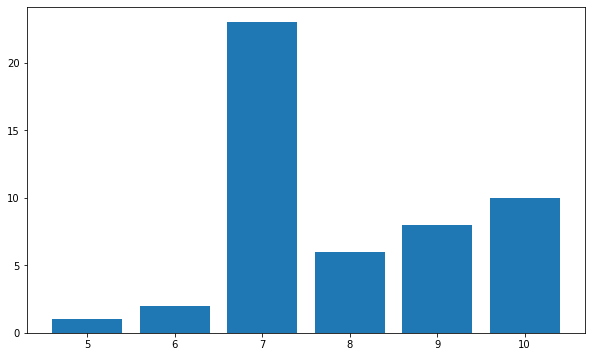

In [243]:
f,ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(df["pentingpancasila"].unique(), df["pentingpancasila"].value_counts())

In [262]:
df.groupby("status")["partisipasi"].value_counts()[1:3]

status     partisipasi
Mahasiswa  True           24
           False          10
Name: partisipasi, dtype: int64

[Text(True, 0, 'true'), Text(False, 0, 'false')]

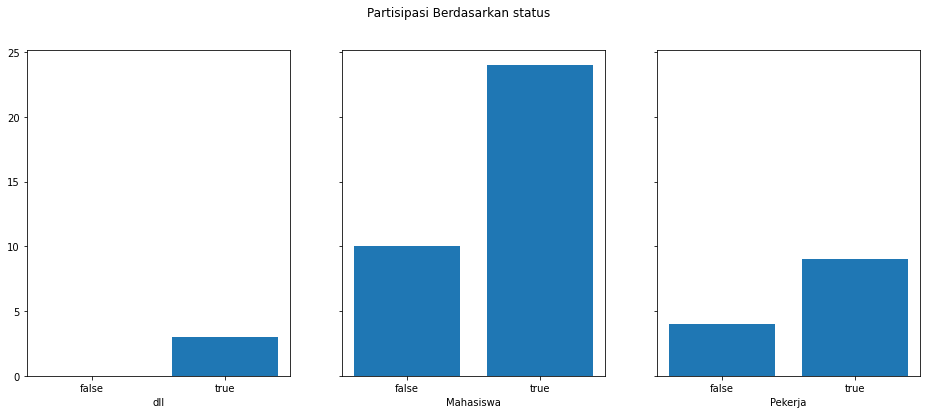

In [267]:
f,ax = plt.subplots(1,3,figsize=(16,6),sharex=True,sharey=True)
f.suptitle("Partisipasi Berdasarkan status")
ax[0].bar(df.groupby('status')["partisipasi"].unique()[0],df.groupby("status")["partisipasi"].value_counts()[0:1])
ax[0].set(xlabel="dll",)
ax[0].set_xticks(df["partisipasi"].unique())
ax[0].set_xticklabels(["true","false"])
ax[1].bar(df.groupby('status')["partisipasi"].unique()[1],df.groupby("status")["partisipasi"].value_counts()[1:3])
ax[1].set(xlabel="Mahasiswa",)
ax[1].set_xticks(df["partisipasi"].unique())
ax[1].set_xticklabels(["true","false"])
ax[2].bar(df.groupby('status')["partisipasi"].unique()[2],df.groupby("status")["partisipasi"].value_counts()[3:])
ax[2].set(xlabel="Pekerja")
ax[2].set_xticks(df["partisipasi"].unique())
ax[2].set_xticklabels(["true","false"])

[Text(True, 0, 'true'), Text(False, 0, 'false')]

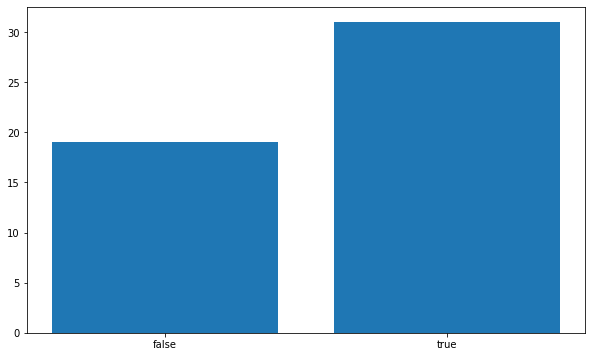

In [250]:
f,ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(df["partisipasi"].unique(),df["partisipasi"].value_counts())
ax.set_xticks(df["partisipasi"].unique())
ax.set_xticklabels(["true","false"])